In [71]:
from sklearn.linear_model import LinearRegression       # 선형회귀
from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
from sklearn.preprocessing import StandardScaler        # 표준화 작업
from sklearn.model_selection import train_test_split    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
import random
import seaborn as sns

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

In [72]:
# alcohol	sugar	pH - 화이트와인, 레드와인을 분류하는 모델 구현

In [73]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [74]:
# 위의 데이터를 가지고 로지스틱회귀로 모델을 구현하기
wine.info()
wine.shape
wine.describe()

## => sugar의 max : 65.8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [75]:
#class -> 시각화작업
# sns

In [76]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [77]:
data = wine[['alcohol', 'sugar', 'pH']]
result = wine['class']

In [78]:
train_input, test_input, train_target, test_target = train_test_split(
    data,result,random_state=42
) 

In [79]:
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [80]:
# 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [81]:
# 예측률
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7859195402298851
0.7655384615384615


In [82]:
# 예측률이 낮은 경우 
# 경사하강법 머신러닝 훈련
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42 )
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', random_state=42)

In [83]:
train_score = []
test_score = []
classes = np.unique(train_target)

In [84]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes =classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [85]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7859195402298851
0.7655384615384615


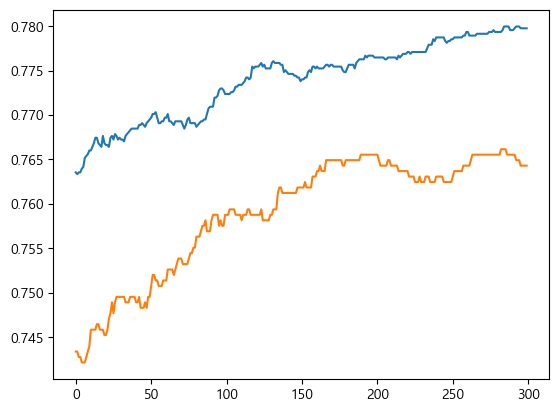

In [86]:
plt.plot(train_score)
plt.plot(test_score)

### 결정트리 모델

In [87]:
# 피쳐 너무 적고, 정답률 높지 않아서 다른 모델을 대입해서 사용해봐야 함!

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 순수노드가 나올때까지 훈련을 한 수치임
# 과대적합 but - test 85% (높은 정답률)

0.9973316912972086
0.8516923076923076


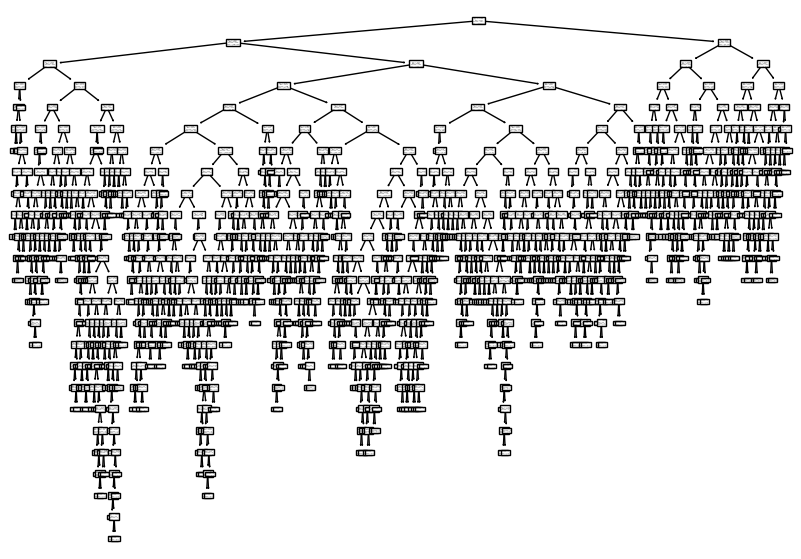

In [88]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

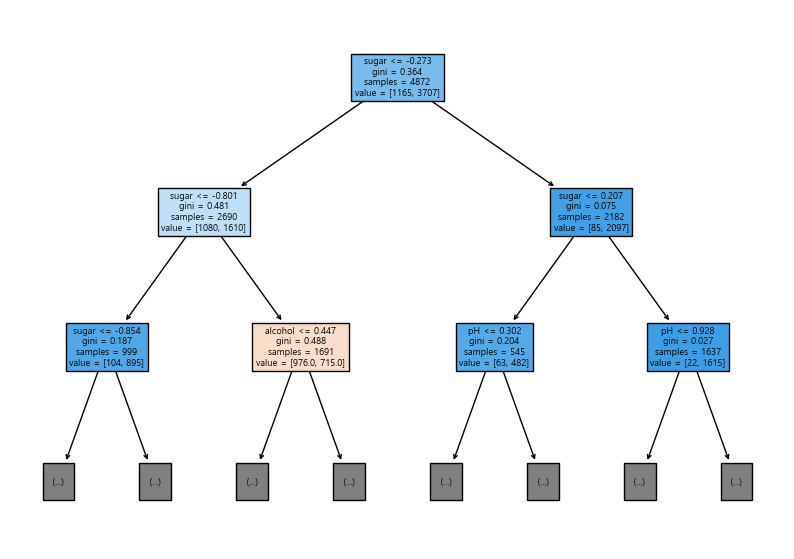

In [89]:
plt.figure(figsize=(10,7))
# 노드(가지) : 깊이를 조정 -> max_depth
# filled : 색상조정 (진한파랑 - 양성클래스(1), 주황색 - 음성클래스(0))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

In [90]:
# 가지치기를 하여 과대적합 문제를 해결
# 3,4,5....10 가장 효율이 좋은 모델을 적용
dt =  DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [91]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8499589490968801
0.8363076923076923


In [92]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

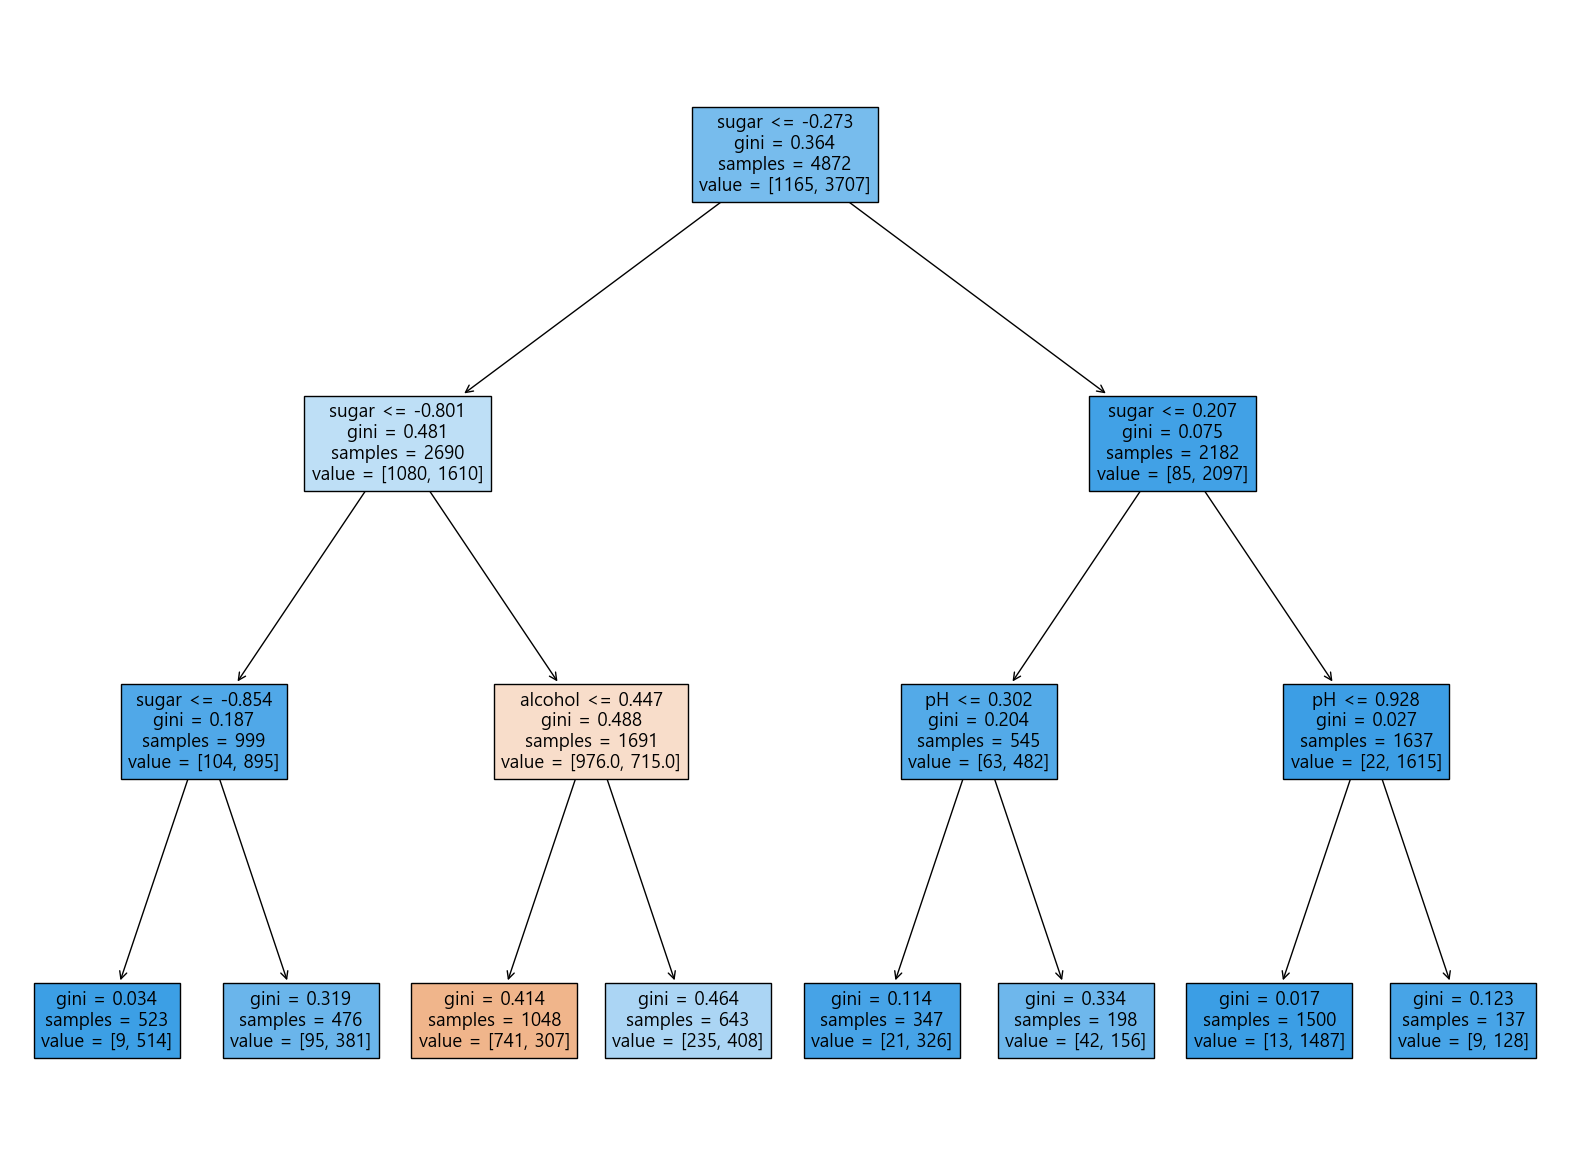

In [93]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names=wine.columns)
plt.show()

In [95]:
# min_impurity_decrease : 최소 불순도 조정 -> 속도개선, 효율도 올릴 수 있도록 모델을 조정
# 부모의 불순도 - 자식의 불순도 -> 크기가 큰 쪽을 선택, 차이가 0.005 미만이면 결정
# 과대적합 해결 - max_depth, min_impurity, decrease
df = DecisionTreeClassifier(min_impurity_decrease=0.00001, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8499589490968801
0.8363076923076923
